In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Voor een betere display met `head()`

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df_read = pd.read_csv("data/sap_storing_data_hu_project.csv", low_memory=False)

In [4]:
df_full = df_read.copy()

Kolommen gemarkeerd als 'nvt' of '?' worden verwijderd

In [5]:
nvt_columns = ["stm_sap_mon_meld_ddt", "stm_mon_begin_ddt", "stm_mon_toelichting_trdl",  "stm_oh_pg_mld",  "stm_geo_mld_uit_functiepl",  "stm_scenario_mon",  "stm_status_melding_sap",  "stm_mon_nr_status_omschr",  "stm_mon_nr__statuscode",  "stm_mon_nr_status_wijzdd",  "stm_aanntpl_ddt",  "stm_geo_gst_uit_functiepl",  "stm_objectdl_code_gst",  "stm_objectdl_groep_gst",  "stm_progfh_in_ddt",  "stm_progfh_in_invoer_ddt",  "stm_progfh_gw_ddt",  "stm_progfh_gw_lwd_ddt",  "stm_progfh_hz", "stm_veroorz_groep", "stm_veroorz_code", "stm_veroorz_tekst_kort", "stm_effect", "stm_afspr_aanvangddt", "stm_mon_eind_ddt", "stm_mon_vhdsincident", "stm_dir_betrok_tr", "stm_aangelegd_dd", "stm_aangelegd_tijd", "stm_mon_begindatum", "stm_mon_begintijd", "stm_progfh_gw_datum", "stm_mon_eind_datum", "stm_mon_eind_tijd", "stm_controle_dd", "stm_akkoord_mon_toewijz", "stm_status_sapnaarmon", "stm_fact_jn", "stm_akkoord_melding_jn", "stm_afsluit_ddt", "stm_afsluit_dd", "stm_afsluit_tijd", "stm_rec_toegev_ddt", "stm_hinderwaarde", "stm_actie", "stm_standplaats", "stm_status_gebr", "stm_wbi_nummer", "stm_projnr", "stm_historie_toelichting", "stm_schade_verhaalb_jn", "stm_schadenr", "stm_schade_status_ga", "stm_schade_statusdatum", "stm_relatiervo_vorig", "stm_relatiervo_volgend", "stm_relatiervo", "stm_afspr_func_hersteldd", "stm_afspr_func_hersteltijd", "stm_sorteerveld", "stm_rapportage_maand", "stm_rapportage_jaar", "stm_x_bron_publ_dt", "stm_x_bron_bestandsnaam", "stm_x_bron_arch_dt", "stm_x_actueel_ind", "stm_x_run_id", "stm_x_bk", "stm_x_start_sessie_dt", "stm_x_vervallen_ind", "stm_evb", "stm_functiepl_mld", "stm_functiepl_gst", "stm_arbeid", "stm_progfh_in_duur", "stm_progfh_gw_lwd_datum", "stm_progfh_gw_lwd_tijd", "stm_progfh_gw_duur", "stm_afspr_aanvangdd", "stm_afspr_aanvangtijd", "stm_reactie_duur"]

for x in nvt_columns:
    df_full.drop(x, axis=1, inplace=True)

Er word een nieuwe dataframe gemaakt met die alleen de kolommen bevat die wij int

In [6]:
df = df_full[["stm_fh_duur", "stm_sap_meld_ddt",  "stm_geo_mld",  "stm_equipm_nr_mld",  "stm_equipm_soort_mld",  "stm_km_van_mld",  "stm_km_tot_mld",  "stm_prioriteit",  "stm_geo_gst",  "stm_oorz_code",  "stm_tao_indicator",  "stm_tao_indicator_vorige",  "stm_tao_soort_mutatie",  "stm_tao_telling_mutatie",  "stm_tao_beinvloedbaar_indicator",  "stm_sap_melddatum",  "stm_sap_meldtijd",  "stm_contractgeb_mld",  "stm_techn_mld",  "stm_techn_gst",  "stm_aanngeb_dd",  "stm_aanngeb_tijd",  "stm_aanntpl_dd",  "stm_aanntpl_tijd", "stm_sap_storeinddatum", "stm_sap_storeindtijd"]]

In [7]:
# df.tail(20)

strings naar datums converten

In [8]:
# df['stm_sap_storeindtijd'][df['stm_sap_storeindtijd']==":"].count()
df = df[df['stm_sap_storeindtijd']!="::"]
df = df[df['stm_sap_storeindtijd']!=":"]

In [9]:
df['stm_sap_storeind'] = pd.to_datetime(df['stm_sap_storeindtijd'] + ' ' + df['stm_sap_storeinddatum'],errors='coerce')

In [10]:
df['stm_sap_meld'] = pd.to_datetime(df['stm_sap_meldtijd'] + ' ' + df['stm_sap_melddatum'],errors='coerce')

In [11]:
df['stm_aanngeb'] = pd.to_datetime(df['stm_aanngeb_tijd'] + ' ' + df['stm_aanngeb_dd'],errors='coerce')

In [12]:
df['stm_aanntpl'] = pd.to_datetime(df['stm_aanntpl_tijd'] + ' ' + df['stm_aanntpl_dd'],errors='coerce')

In [13]:
df['stm_sap_storeind'].count()

661166

In [14]:
# # Verkeerde/lege data droppen
df = df.dropna(subset=['stm_sap_storeind'])
df = df.dropna(subset=['stm_sap_meld'])

In [15]:
df['stm_sap_storeind'].count()

661090

In [16]:
# Oude kolommen droppen
df.drop(columns=['stm_sap_storeinddatum','stm_sap_storeindtijd','stm_aanngeb_dd','stm_aanngeb_tijd','stm_aanntpl_dd','stm_aanntpl_tijd','stm_sap_melddatum','stm_sap_meldtijd','stm_km_van_mld','stm_km_tot_mld'],inplace=True)

objecten naar ints converten

In [17]:
df['stm_prioriteit'] = pd.to_numeric(df['stm_prioriteit'],errors='coerce')
df['stm_geo_gst'] = pd.to_numeric(df['stm_geo_gst'],errors='coerce')
df['stm_geo_mld'] = pd.to_numeric(df['stm_geo_mld'],errors='coerce')
df['stm_fh_duur'] = pd.to_numeric(df['stm_fh_duur'],errors='coerce')

# df['stm_techn_gst'] = pd.Categorical(df['stm_techn_gst'])

In [18]:
df = df.dropna(subset=['stm_prioriteit'])
df = df.dropna(subset=['stm_geo_gst'])
df = df.dropna(subset=['stm_geo_mld'])
df = df.dropna(subset=['stm_fh_duur'])
df = df.dropna(subset=['stm_oorz_code'])

In [19]:
df['stm_sap_storeind'].count()

545476

Time en Date collums combineren in datetime collumns

In [20]:
df.dtypes

stm_fh_duur                               float64
stm_sap_meld_ddt                           object
stm_geo_mld                               float64
stm_equipm_nr_mld                         float64
stm_equipm_soort_mld                       object
stm_prioriteit                            float64
stm_geo_gst                               float64
stm_oorz_code                             float64
stm_tao_indicator                          object
stm_tao_indicator_vorige                   object
stm_tao_soort_mutatie                      object
stm_tao_telling_mutatie                     int64
stm_tao_beinvloedbaar_indicator            object
stm_contractgeb_mld                       float64
stm_techn_mld                              object
stm_techn_gst                              object
stm_sap_storeind                   datetime64[ns]
stm_sap_meld                       datetime64[ns]
stm_aanngeb                        datetime64[ns]
stm_aanntpl                        datetime64[ns]


In [21]:
df.count()

stm_fh_duur                        545476
stm_sap_meld_ddt                   545476
stm_geo_mld                        545476
stm_equipm_nr_mld                  466301
stm_equipm_soort_mld               466300
stm_prioriteit                     545476
stm_geo_gst                        545476
stm_oorz_code                      545476
stm_tao_indicator                  545068
stm_tao_indicator_vorige           211993
stm_tao_soort_mutatie              114567
stm_tao_telling_mutatie            545476
stm_tao_beinvloedbaar_indicator    545476
stm_contractgeb_mld                466234
stm_techn_mld                      466768
stm_techn_gst                      545476
stm_sap_storeind                   545476
stm_sap_meld                       545476
stm_aanngeb                        545255
stm_aanntpl                        516008
dtype: int64

In [22]:
(df['stm_sap_storeind']-df['stm_sap_meld']).median()

Timedelta('0 days 03:02:00')

In [23]:
df.head()

,stm_fh_duur,stm_sap_meld_ddt,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_prioriteit,stm_geo_gst,stm_oorz_code,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_techn_mld,stm_techn_gst,stm_sap_storeind,stm_sap_meld,stm_aanngeb,stm_aanntpl
1,0.0,02/01/2006 09:00:00,624.0,NaN,NaN,9.0,624.0,133.0,N,NaN,NaN,0,B,NaN,NaN,S,2006-02-01 09:00:00,2006-02-01 09:00:00,2006-02-01 09:00:00,NaT
2,51.0,02/01/2006 12:35:00,201.0,NaN,NaN,9.0,201.0,143.0,N,NaN,NaN,0,NB,NaN,NaN,B,2006-02-01 13:26:00,2006-02-01 12:35:00,2006-02-01 12:35:00,NaT
3,40.0,02/01/2006 16:40:00,25.0,NaN,NaN,9.0,25.0,142.0,N,NaN,NaN,0,NB,NaN,NaN,B,2006-02-01 17:20:00,2006-02-01 16:40:00,2006-02-01 16:40:00,NaT
4,6.0,02/01/2006 22:30:00,12.0,NaN,NaN,9.0,12.0,142.0,N,NaN,NaN,0,NB,NaN,NaN,B,2006-02-01 22:36:00,2006-02-01 22:30:00,2006-02-01 22:30:00,NaT
6,13.0,02/01/2006 23:25:00,551.0,NaN,NaN,9.0,551.0,142.0,N,NaN,NaN,0,NB,NaN,NaN,B,2006-03-01 09:44:00,2006-02-01 23:25:00,2006-02-01 23:25:00,NaT


In [24]:
df.describe()

,stm_fh_duur,stm_geo_mld,stm_equipm_nr_mld,stm_prioriteit,stm_geo_gst,stm_oorz_code,stm_tao_telling_mutatie,stm_contractgeb_mld
count,545476.000000,545476.000000,4.663010e+05,545476.000000,545476.000000,545476.000000,545476.000000,466234.000000
mean,964.831652,341.821855,1.056978e+07,3.739811,341.283149,198.460682,0.110232,23.154748
std,6213.017659,269.445416,4.376780e+05,1.477180,269.287167,46.419933,0.322085,17.898731
min,0.000000,0.000000,1.000001e+07,1.000000,0.000000,48.000000,-1.000000,0.000000
25%,56.000000,87.000000,1.021127e+07,2.000000,87.000000,148.000000,0.000000,9.000000
50%,118.000000,226.000000,1.052733e+07,4.000000,226.000000,215.000000,0.000000,21.000000
75%,365.000000,553.000000,1.081592e+07,5.000000,553.000000,221.000000,0.000000,31.000000
max,528297.000000,952.000000,1.167287e+07,9.000000,952.000000,999.000000,1.000000,99.000000


### Baseline

Er word een gemmidelde duratie van de storingen gezocht.

In [25]:
# df['delta_storeind_meld'] = df['stm_sap_storeind'] - df['stm_sap_meld']
# df['delta_storeind_meld'] = df['delta_storeind_meld'].astype('timedelta64[m]')
# df['delta_storeind_meld'].describe()

# df['delta_storeind_meld'] = df['delta_storeind_meld'][df['delta_storeind_meld'].between(0, 360)]

df = df[df['stm_fh_duur']<=360]

In [26]:
tech_fields_averages = {};
for tech_field in df['stm_techn_gst'].unique():
    tech_fields_averages[tech_field]=(df[df['stm_techn_gst']==tech_field]['stm_fh_duur'].mean())
    
tech_fields_averages['nan']=df['stm_fh_duur'][df['stm_techn_mld'].isna()].mean()

tech_fields_averages

{'S': 105.21338751591468,
 'B': 104.17822469501301,
 'E': 112.37662698082313,
 'G': 102.73863153421165,
 'T': 116.75807159425742,
 'X': 85.45340383344349,
 'K': 112.23409116237602,
 'P': 46.67882147024504,
 'I': 123.42362344582594,
 'M': 106.2433090024331,
 'O': 107.40637247416909,
 'A': 120.96428571428571,
 'R': 147.0,
 'nan': 101.19149554105306}

In [27]:
df['techniek_gem_duur'] = df['stm_techn_gst']
for tech_field in df['stm_techn_gst'].unique():
    df['techniek_gem_duur'] = df['techniek_gem_duur'].replace(tech_field,tech_fields_averages[tech_field])
    
df['techniek_gem_duur'] = df['techniek_gem_duur'].fillna(tech_fields_averages['nan'])

In [28]:
oorz_codes_averages = {};
for oorz_code in df['stm_oorz_code'].unique():
    oorz_codes_averages[oorz_code]=(df[df['stm_oorz_code']==oorz_code]['stm_fh_duur'].mean())
    
oorz_codes_averages['nan']=df['stm_fh_duur'][df['stm_oorz_code'].isna()].mean()

oorz_codes_averages

{133.0: 107.82600131319764,
 143.0: 121.28628343767787,
 142.0: 31.60076670317634,
 141.0: 69.87174721189591,
 135.0: 101.20996662958844,
 151.0: 97.63967629639676,
 218.0: 102.68147472642,
 189.0: 55.606015037593984,
 145.0: 89.03805867576662,
 131.0: 61.61594202898551,
 146.0: 95.91895958727429,
 186.0: 118.29662766689607,
 148.0: 64.90815709969789,
 134.0: 91.23353293413173,
 299.0: 54.306809184481395,
 221.0: 106.49779307909604,
 140.0: 109.12981766568403,
 298.0: 53.748958883218954,
 147.0: 96.97452811041201,
 130.0: 94.28787878787878,
 215.0: 121.18278794509648,
 150.0: 106.1427660930529,
 132.0: 107.18701550387597,
 294.0: 46.765625947256744,
 220.0: 118.26898326898326,
 213.0: 124.29773195876288,
 212.0: 115.2968599807754,
 242.0: 111.85486018641811,
 183.0: 115.8012077294686,
 149.0: 93.820815175596,
 227.0: 113.96593673965937,
 209.0: 124.66301703163018,
 144.0: 126.74621733149931,
 184.0: 115.55643564356436,
 181.0: 126.19775095995611,
 187.0: 123.40201005025126,
 219.0: 121

In [29]:
df['stm_oorz_code_gem_duur'] = df['stm_oorz_code']
for oorz_code in df['stm_oorz_code'].unique():
    df['stm_oorz_code_gem_duur'] = df['stm_oorz_code_gem_duur'].replace(oorz_code,oorz_codes_averages[oorz_code])
    
df['stm_oorz_code_gem_duur'] = df['stm_oorz_code_gem_duur'].fillna(oorz_codes_averages['nan'])

We zien dat er wat extreme waardes tussen zitten. Zo hebben we een storing die maarliefst 1,89 jaar duurt, en minstens een met een negatieve duur (waarschijnlijk omdat `stm_sap_meld` onbreekt).

Storingen die langer dan 8 uur duren beschouwen wij als 'speciale' gevallen, en vinden wij niet interessant voor ons doel om algemenere storingen te voorspellen. Waardes die terug de tijd in gaan vinden we interessant doch irrelevant voor de questie.

In [30]:
#df_full.loc[df['delta_storeind_meld'].idxmin()]

In [31]:
# df['stm_techn_gst'].value_counts()
df.count()

stm_fh_duur                        408379
stm_sap_meld_ddt                   408379
stm_geo_mld                        408379
stm_equipm_nr_mld                  349509
stm_equipm_soort_mld               349508
stm_prioriteit                     408379
stm_geo_gst                        408379
stm_oorz_code                      408379
stm_tao_indicator                  408085
stm_tao_indicator_vorige           151792
stm_tao_soort_mutatie               92963
stm_tao_telling_mutatie            408379
stm_tao_beinvloedbaar_indicator    408379
stm_contractgeb_mld                349469
stm_techn_mld                      349845
stm_techn_gst                      408379
stm_sap_storeind                   408379
stm_sap_meld                       408379
stm_aanngeb                        408163
stm_aanntpl                        385876
techniek_gem_duur                  408379
stm_oorz_code_gem_duur             408379
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D08BF76608>,
      dtype=object)

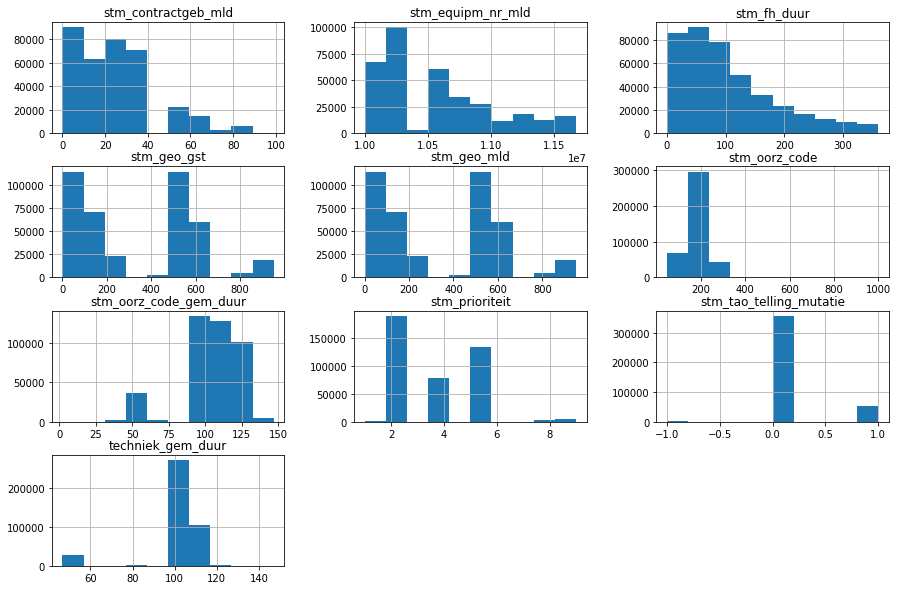

In [32]:
df.hist(figsize=[15,10])

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
df = df.dropna(subset=['stm_fh_duur'])

# Decision Tree regressie

In [35]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
df['stm_techn_encoded'] =  lab_enc.fit_transform(df['stm_techn_gst'])

In [36]:
X = df[['stm_techn_encoded','stm_oorz_code','stm_prioriteit']]
y = df['stm_fh_duur']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,train_size=0.9)
print('Aantal trainwaarden {0:d}'.format(len(X_train)))
print('Aantal testwaarden {0:d}'.format(len(y_test)))

Aantal trainwaarden 367541
Aantal testwaarden 40838


In [37]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train,y_train)
print("ACC :",decision_tree_classifier.score(X_test,y_test))
pred = decision_tree_classifier.predict(X_test)
print("MSE :",mean_absolute_error(y_test,pred))
print("RMSE:",sqrt(mean_squared_error(y_test, decision_tree_classifier.predict(X_test))))

ACC : 0.028184534012439394
MSE : 64.2869141485871
RMSE: 94.76636851539976


# Linearregressie

In [38]:
X = df[['stm_oorz_code_gem_duur','techniek_gem_duur']]
y = df['stm_fh_duur']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,train_size=0.9)
print('Aantal trainwaarden {0:d}'.format(len(X_train)))
print('Aantal testwaarden {0:d}'.format(len(y_test)))

Aantal trainwaarden 367541
Aantal testwaarden 40838


In [39]:
linear_classifier = LinearRegression().fit(X_train, y_train)
y_pred = linear_classifier.predict(X_test)
# print("tree_classifier Score  :",tree_classifier.score(X, y))
print("linear_classifier Score   :",linear_classifier.score(X_test, y_test))
print("linear_classifier MSE     :",mean_absolute_error(y_test,y_pred))
print("linear_classifier RMSE    :",sqrt(mean_squared_error(y_test, linear_classifier.predict(X_test))))

linear_classifier Score   : 0.07605293699349602
linear_classifier MSE     : 60.891295345674536
linear_classifier RMSE    : 78.36032307902241


In [40]:
# df.plot.scatter('stm_techn_gst','delta_storeind_meld')